In [1]:
from graphs import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from math import inf, log, exp
from tqdm import tqdm
from cycler import cycler

np.random.seed = 2


In [2]:
def follow_model(A, x_init, s_init, W, source, destination, policy, term_flag=False, signal_flag=False, lookahead=0):
    xt = x_init
    st = s_init
    X = []
    S = []
    X.append(xt)
    S.append(st)
    B = A
    current_link = source
    aggr_cost = []
    path_taken = []
    path_taken.append(source)
    cost_incurred = 0
    aggr_cost.append(cost_incurred)

    while current_link is not destination:
        # Todo: signal flag
        decision = policy_fn(A, xt, st, current_link, destination, policy=policy,
                             term_flag=term_flag, signal_flag=signal_flag, lookahead=lookahead)

        path_taken.append(decision)

        if decision is None:
            print(policy, "no path")
            cost_incurred = inf
            break

        wt = W[len(aggr_cost)-1]
        if signal_flag:
            st = generate_signal(st)
            B = signalized(A, st)
            xt = state_transition(B, xt, wt)
            S.append(st)

        else:
            xt = state_transition(A, xt, wt)

        X.append(xt)

        cost_incurred += compute_cost(xt, decision, destination)
        aggr_cost.append(cost_incurred)

        current_link = decision

        if len(X) == len(x_init):
            break

    return cost_incurred, aggr_cost, path_taken


In [6]:
    size = 20
    time_steps = size

    xt = np.random.rand(size)
    xt = xt/xt.sum()
    st = np.zeros_like(xt)
    while (sum(st) == 0) or (sum(st) > 0.8*len(st)):
        st = np.random.choice([0,1], size=size, p=[0.4, 0.6])

    A = generate_column_stochastic_matrix(size)

    term_flag = True
    num_trials = 1
    config = [{"policy": "dijkstra", "signal_flag": True, "lookahead": 1},
              {"policy": "dijkstra", "signal_flag": True, "lookahead": 0},
              {"policy": "dijkstra", "signal_flag": False, "lookahead": 1},
              {"policy": "dijkstra", "signal_flag": False, "lookahead": 0},
              {"policy": "greedy", "signal_flag": True, "lookahead": 1},
              {"policy": "greedy", "signal_flag": True, "lookahead": 0},
              {"policy": "greedy", "signal_flag": False, "lookahead": 1},
              {"policy": "greedy", "signal_flag": False, "lookahead": 0}]

    cost = dict.fromkeys(list(range(len(config))))

    aggr_cost = dict.fromkeys(list(range(len(config))))

    path = dict.fromkeys(list(range(len(config))))
    for ind in range(len(config)):
        cost[ind] = [0]*size
        aggr_cost[ind] = []
        path[ind] = []

    for _ in range(num_trials):
        W = []
        for i in range(time_steps):
            W.append(gaussian(0, 0.1, size))
        print("start")
        for j in range(len(xt)):

            print(j, is_exists_path(A, 6, j))
            if is_exists_path(A, 6, j):

                for ind in range(len(config)):

                    temp_cost, temp_aggr_cost, temp_path = follow_model(A, xt, st, W, source=6, destination=j,
                                                                        policy=config[ind]["policy"],
                                                                        term_flag=False,
                                                                        signal_flag=config[ind]["signal_flag"],
                                                                        lookahead=config[ind]["lookahead"])

                    cost[ind][j] += temp_cost
                    aggr_cost[ind].append(temp_aggr_cost)
                    path[ind].append(temp_path)


/home/jayanth/thesis/adaptive/traffic_model.py:20: RuntimeWarning: invalid value encountered in true_divide
  A = A/A.sum(axis=0)


start
0 True
1 True
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found

13 True
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path not found, how?
path 

3


IndexError: list index out of range

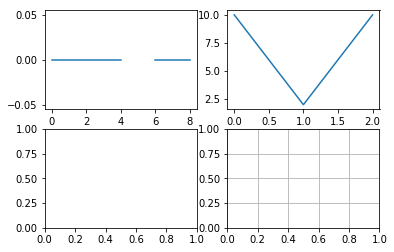

In [4]:
# %matplotlib inline
# import mpld3
# mpld3.enable_notebook()

f, ax = plt.subplots(2, 2)
plt.grid()
n = np.random.randint(size-1)
print(n)

for ind in [2,3,6,7]:
# for ind in [0,1,4,5]:
    ax[0,0].plot(cost[ind], label=str(ind))
    ax[0,1].plot([len(l) for l in aggr_cost[ind]], label=str(ind))
    ax[1,0].plot(path[ind][n], label=str(ind))
    ax[1,1].plot(aggr_cost[ind][n], label=str(ind))
plt.legend()
plt.show()